# LAB 1: ANN and PyTorch

In this lab, you will start off by constructing a neural networks from scratch to get a stronger understanding of what is required to make neural networks work.

Then in the second part of the lab you will train a neural network (using PyTorch) to classify an image into one of two classes: "car" or "truck". The code for the neural networks 
you train will be written for you, and you are not (yet!) expected
to understand all provided code. However, by the end of the lab,
you should be able to:

1. Understand at a high level the training loop for a machine learning model.
2. Understand the distinction between training, validation, and test data.
3. The concepts of overfitting and underfitting.
4. Investigate how different hyperparameters, such as learning rate and batch size, affect the success of training.
5. Compare an ANN (aka Multi-Layer Perceptron) with a CNN.

### What to submit

Submit an HTML file containing all your code, outputs, and write-up
from parts A and B. You can produce a HTML file directly from Google Colab. The Colab instructions are provided at the end of this document.

**Do not submit any other files produced by your code.**

Include a link to your colab file in your submission.

Please use Google Colab to complete this assignment. If you want to use Jupyter Notebook, please complete the assignment and upload your Jupyter Notebook file to Google Colab for submission. 

## Colab Link

Include a link to your colab file here

Colab Link: https://colab.research.google.com/drive/1-yVchKEV0WlpfikQGMF-m5reo84sctOT?usp=sharing

#PART A: Constructing a Neural Network [15 pt]

Before we get into using PyTorch to train our classifier we will go through the process of creating our neural network from scratch. We've seen in the tutorial how to build a 1-layer network, now we'll take it one step further to build a 2-layer network. This is an important exercise that everyone should attempt at least once to understand and truly appreciate the workings of neural networks.

## Part 0. Helper Functions

To help guide the construction we will use the iris dataset that was introduced in the tutorial. Provided are some helper code to get us started:

In [3]:
# load "Iris_3class.csv" to Google Colab
from google.colab import files
uploaded = files.upload()

Saving Iris_3class.csv to Iris_3class.csv


In [4]:
import pandas as pd
import numpy as np

raw_data = pd.read_csv("Iris_3class.csv", header = None)
raw_data = raw_data.values
np.random.shuffle(raw_data)

In [5]:
import numpy as np
# raw_data = raw_data.values

# split your data into training and validation
X_train = raw_data[0:100,:4]
y_train = raw_data[0:100,4:5].astype(int)
X_val = raw_data[100:,:4]
y_val = raw_data[100:,4:5].astype(int)

print(X_train.shape, y_train.shape)
print(X_train.dtype, y_train.dtype)
print(X_val.shape, y_val.shape)
print(X_val.dtype, y_val.dtype)

(100, 4) (100, 1)
float64 int64
(50, 4) (50, 1)
float64 int64


Recall that the neural network output consists of several nodes, one for each output class. Since the labels are provided as integers we will need to convert them into one-hot vectors to match the neural network output format.

In [6]:
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

In [7]:
y_train = to_one_hot(y_train.astype(int))
print(X_train.shape, y_train.shape)
print(X_train.dtype, y_train.dtype)

y_val = to_one_hot(y_val.astype(int))
print(X_val.shape, y_val.shape)
print(X_val.dtype, y_val.dtype)
# print(y_train, y_val)

(100, 4) (100, 3)
float64 float64
(50, 4) (50, 3)
float64 float64


In [8]:
#verify one-hot encoding
y_train[0:5,:]

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

### Part 1. Develop a 2-layer ANN [5 pt]
At its core a 2-layer neural network is just a few lines of code. Most of the complexity comes from setting up the training of the network.

Using vectorized form, set up the neural network training to use a cross-entropy loss function and determine the gradients with resepect to the layer 1 and layer 2 weights.

In [9]:
# write code to create a 2-layer ANN in vectorized form

#define sigmoid
def sigmoid(x):
    return 1/(1+np.exp(-x))

#define softmax
def softmax(x):
  e = np.exp(x)
  return e/e.sum(axis=1, keepdims = True)


def ann(W, X_train, y_train):

  num_hidden = 5
  num_features = 4
  num_outputs = 3

  #Weights
  w0 = W[:20].reshape(num_features, num_hidden)
  w1 = W[20:].reshape(num_hidden, num_outputs)

  #Feed forward
  layer0 = X_train
  layer1 = sigmoid(np.dot(layer0, w0)) 
  layer2 = np.dot(layer1, w1)
  
  # softmax
  output = softmax(layer2)

  #Back propagation using gradient descent
  
  #cross-entropy loss
  N = y_train.shape[0]
  max_y_train = y_train.argmax(axis=1)
  p = output[range(N),max_y_train]
  error = np.sum(-np.log(output[range(y_train.shape[0]),y_train.argmax(axis=1)])) / y_train.shape[0] 
  # error = np.sum(-np.log(output[range(y_train.shape[0]),y_train.argmax(axis=1)]))   


  #initialize gradients to zero 
  dw0 = np.zeros((4,5)) # TO BE COMPLETED
  dw1 = np.zeros((5,3)) # TO BE COMPLETED

  #calculate gradients
  derror2 = output - y_train
  derror1 = np.multiply(np.multiply(layer1,(1-layer1)), (derror2 @ w1.T))

  #determine gradients
  dw1 += (layer1.T @ derror2)/N 
  dw0 += (X_train.T @ derror1)/N 
  
  #combine gradients into one vector
  dW = np.array(list(dw0.flatten()) + list(dw1.flatten())) # TO BE COMPLETED

  return (error, dW, layer2)


### Part 2. Train your neural network. How well does your network work on the iris dataset? [5 pt]

In [10]:
num_hidden = 5
num_features = 4
num_outputs = 3
  
#initialize weights
w0 = 2*np.random.random((num_features, num_hidden)) - 1
w1 = 2*np.random.random((num_hidden, num_outputs)) - 1

#combine weights into a single vector
W = np.array(list(w0.flatten()) + list(w1.flatten()))

#train network
n = 0.001
iterations = 100000
errors = []
for i in range(iterations):
  (error, dW, y_pred) = ann(W, X_train, y_train)
  W += -dW * n
  errors.append(error)
  # print('Iteration: ', i)


In [11]:
#examine predictions on training data
(_, _, y_pred) = ann(W, X_train, y_train)
pred = np.round(y_pred, 0)
pred[:5]

array([[-2.,  1.,  2.],
       [-2.,  1.,  2.],
       [ 3., -0., -3.],
       [-1.,  2., -0.],
       [ 3., -0., -3.]])

In [12]:
#examine ground truth training data
train = np.round(y_train, 0)
train[:5]

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

### Part 3. Validate that the gradients were computed correctly for the 2-layer neural network you developed. [5 pt]

In [13]:
#write code to numerical verify the gradients you calculated

num_hidden = 5
num_features = 4
num_outputs = 3
  
#initialize weights
w0 = 2*np.random.random((num_features, num_hidden)) - 1
w1 = 2*np.random.random((num_hidden, num_outputs)) - 1

#combine weights
W = np.array(list(w0.flatten()) + list(w1.flatten()))


#compute gradients analytically
(error, dW, y_pred) = ann(W, X_train, y_train)

#compute gradients numerically
dW_num = np.zeros((len(W),1))

for ind in range(len(W)):
  #reset gradients
  We1 = np.array(list(w0.flatten()) + list(w1.flatten()))
  We2 = np.array(list(w0.flatten()) + list(w1.flatten()))
  
  #increment slightly
  We1[ind] = We1[ind] + 0.000001# TO BE COMPLETED
  We2[ind] = We2[ind] - 0.000001# TO BE COMPLETED
  
  #compute errors
  (error_e1, dW_e1, y_pred1) = ann(We1, X_train, y_train)
  (error_e2, dW_e2, y_pred2) = ann(We2, X_train, y_train)
  
  #obtain numerical gradients
  grad_num = (error_e1-error_e2)/0.000002# TO BE COMPLETED
  
  #display difference between numerical and analytic gradients
  print(round(abs(grad_num - dW[ind]), 4), grad_num, dW[ind])


0.0 0.006792287177148637 0.006792287186276283
0.0 0.2782230709152955 0.2782230708291471
0.0 -0.026658551144365106 -0.026658551111179336
0.0 0.06663110418969609 0.06663110422366034
0.0 0.013649328667320049 0.013649328638021754
0.0 0.005430303096076727 0.0054303030516671446
0.0 0.20021913949008763 0.2002191394101839
0.0 -0.019407043416741487 -0.019407043405356674
0.0 0.06202294455803781 0.06202294453288697
0.0 0.005298232519379553 0.005298232382176713
0.0 0.00010134137973238921 0.0001013413342793192
0.0 0.06533074980996645 0.06533074978541938
0.0 -0.005125539326300554 -0.005125539439102274
0.0 -0.021085416190835815 -0.02108541623341342
0.0 0.014503046430469624 0.014503046588908566
0.0 -0.00047851478335303455 -0.00047851478033102786
0.0 0.006934405050174064 0.006934405025507112
0.0 -0.00020677703993499108 -0.00020677710121956585
0.0 -0.015898718008777735 -0.015898717960521135
0.0 0.005708845951524211 0.005708845926407525
0.0 -0.15463973379592488 -0.15463973366520326
0.0 0.0788459085798720

# PART B: Cars vs Trucks [35 pt]

In the second part of the lab we will see how we can use PyTorch to train a neural network to identify Cars and Trucks.

In [14]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms


## Part 0. Helper Functions

We will be making use of the following helper functions. You will be asked to look
at and possibly modify some of these, but you are not expected to understand all of them.

You should look at the function names and read the docstrings. If you are curious, come back and explore the code *after* making some progress on the lab.

In [15]:
###############################################################################
# Data Loading

def get_relevant_indices(dataset, classes, target_classes):
    """ Return the indices for datapoints in the dataset that belongs to the
    desired target classes, a subset of all possible classes.

    Args:
        dataset: Dataset object
        classes: A list of strings denoting the name of each class
        target_classes: A list of strings denoting the name of desired classes
                        Should be a subset of the 'classes'
    Returns:
        indices: list of indices that have labels corresponding to one of the
                 target classes
    """
    indices = []
    for i in range(len(dataset)):
        # Check if the label is in the target classes
        label_index = dataset[i][1] # ex: 9
        label_class = classes[label_index] # ex: 'truck'
        if label_class in target_classes:
            indices.append(i)
    return indices

def get_data_loader(target_classes, batch_size):
    """ Loads images of cars and trucks, splits the data into training, validation
    and testing datasets. Returns data loaders for the three preprocessed datasets.

    Args:
        target_classes: A list of strings denoting the name of the desired
                        classes. Should be a subset of the argument 'classes'
        batch_size: A int representing the number of samples per batch
    
    Returns:
        train_loader: iterable training dataset organized according to batch size
        val_loader: iterable validation dataset organized according to batch size
        test_loader: iterable testing dataset organized according to batch size
        classes: A list of strings denoting the name of each class
    """

    classes = ('plane', 'car', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
    ########################################################################
    # The output of torchvision datasets are PILImage images of range [0, 1].
    # We transform them to Tensors of normalized range [-1, 1].
    transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    # Load CIFAR10 training data
    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
    # Get the list of indices to sample from
    relevant_indices = get_relevant_indices(trainset, classes, target_classes)
    
    # Split into train and validation
    np.random.seed(1000) # Fixed numpy random seed for reproducible shuffling
    np.random.shuffle(relevant_indices)
    split = int(len(relevant_indices) * 0.8) #split at 80%
    
    # split into training and validation indices
    relevant_train_indices, relevant_val_indices = relevant_indices[:split], relevant_indices[split:]  
    train_sampler = SubsetRandomSampler(relevant_train_indices)
    train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                               num_workers=1, sampler=train_sampler)
    val_sampler = SubsetRandomSampler(relevant_val_indices)
    val_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                              num_workers=1, sampler=val_sampler)
    # Load CIFAR10 testing data
    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                           download=True, transform=transform)
    # Get the list of indices to sample from
    relevant_test_indices = get_relevant_indices(testset, classes, target_classes)
    test_sampler = SubsetRandomSampler(relevant_test_indices)
    test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                             num_workers=1, sampler=test_sampler)
    return train_loader, val_loader, test_loader, classes

###############################################################################
# Training
def get_model_name(name, batch_size, learning_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path

def normalize_label(labels):
    """
    Given a tensor containing 2 possible values, normalize this to 0/1

    Args:
        labels: a 1D tensor containing two possible scalar values
    Returns:
        A tensor normalize to 0/1 value
    """
    max_val = torch.max(labels)
    min_val = torch.min(labels)
    norm_labels = (labels - min_val)/(max_val - min_val)
    return norm_labels

def evaluate(net, loader, criterion):
    """ Evaluate the network on the validation set.

     Args:
         net: PyTorch neural network object
         loader: PyTorch data loader for the validation set
         criterion: The loss function
     Returns:
         err: A scalar for the avg classification error over the validation set
         loss: A scalar for the average loss function over the validation set
     """
    total_loss = 0.0
    total_err = 0.0
    total_epoch = 0
    for i, data in enumerate(loader, 0):
        inputs, labels = data
        labels = normalize_label(labels)  # Convert labels to 0/1
        outputs = net(inputs)
        loss = criterion(outputs, labels.float())
        corr = (outputs > 0.0).squeeze().long() != labels
        total_err += int(corr.sum())
        total_loss += loss.item()
        total_epoch += len(labels)
    err = float(total_err) / total_epoch
    loss = float(total_loss) / (i + 1)
    return err, loss

###############################################################################
# Training Curve
def plot_training_curve(path):
    """ Plots the training curve for a model run, given the csv files
    containing the train/validation error/loss.

    Args:
        path: The base path of the csv files produced during training
    """
    import matplotlib.pyplot as plt
    train_err = np.loadtxt("{}_train_err.csv".format(path))
    val_err = np.loadtxt("{}_val_err.csv".format(path))
    train_loss = np.loadtxt("{}_train_loss.csv".format(path))
    val_loss = np.loadtxt("{}_val_loss.csv".format(path))
    plt.title("Train vs Validation Error")
    n = len(train_err) # number of epochs
    plt.plot(range(1,n+1), train_err, label="Train")
    plt.plot(range(1,n+1), val_err, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.legend(loc='best')
    plt.show()
    plt.title("Train vs Validation Loss")
    plt.plot(range(1,n+1), train_loss, label="Train")
    plt.plot(range(1,n+1), val_loss, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

## Part 1. Visualizing the Data [5 pt]

We will make use of some of the CIFAR-10 data set, which consists of 
colour images of size 32x32 pixels belonging to 10 categories. You can
find out more about the dataset at https://www.cs.toronto.edu/~kriz/cifar.html

For this assignment, we will only be using the car and truck categories. 
We have included code that automatically downloads the dataset the 
first time that the main script is run.

In [16]:
# This will download the CIFAR-10 dataset to a folder called "data"
# the first time you run this code.
train_loader, val_loader, test_loader, classes = get_data_loader(
    target_classes=["car", "truck"], 
    batch_size=1) # One image per batch

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


### Part (a) -- 1 pt

Visualize some of the data by running the code below.
Include the visualization in your writeup.

(You don't need to submit anything else.)

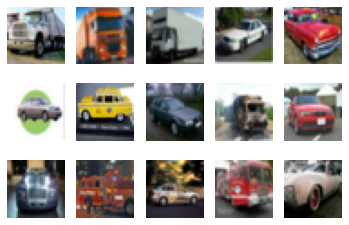

In [17]:
import matplotlib.pyplot as plt

k = 0
for images, labels in train_loader:
    # since batch_size = 1, there is only 1 image in `images`
    image = images[0]
    # place the colour channel at the end, instead of at the beginning
    img = np.transpose(image, [1,2,0])
    # normalize pixel intensity values to [0, 1]
    img = img / 2 + 0.5
    plt.subplot(3, 5, k+1)
    plt.axis('off')
    plt.imshow(img)

    k += 1
    if k > 14:
        break

### Part (b) -- 2 pt

How many training examples do we have for the combined `car` and `truck` classes? 
What about validation examples? 
What about test examples?

In [18]:
print('Number of training examples: ', len(train_loader))
print('Number of validation examples: ', len(val_loader))
print('Number of test examples: ', len(test_loader))

Number of training examples:  8000
Number of validation examples:  2000
Number of test examples:  2000


### Part (c) -- 2pt

Why do we need a validation set when training our model? What happens if we judge the 
performance of our models using the training set loss/error instead of the validation
set loss/error?

We need to evaluate our model when training it on data it hasn't seen. If we evaluate it on data it's been already trained on and seen, then the model is going to assume that it's already performing very well, when in reality, it could be performing poorly on data it hasn't seen. 

## Part 2. Training [10 pt]

We define two neural networks, a `LargeNet` and `SmallNet`.
We'll be training the networks in this section.

You won't understand fully what these networks are doing until
the next few classes, and that's okay. For this assignment, please
focus on learning how to train networks, and how hyperparameters affect
training.

In [19]:
class LargeNet(nn.Module):
    def __init__(self):
        super(LargeNet, self).__init__()
        self.name = "large"
        self.conv1 = nn.Conv2d(3, 5, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(5, 10, 5)
        self.fc1 = nn.Linear(10 * 5 * 5, 32)
        self.fc2 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 10 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

In [20]:
class SmallNet(nn.Module):
    def __init__(self):
        super(SmallNet, self).__init__()
        self.name = "small"
        self.conv = nn.Conv2d(3, 5, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(5 * 7 * 7, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv(x)))
        x = self.pool(x)
        x = x.view(-1, 5 * 7 * 7)
        x = self.fc(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

In [21]:
small_net = SmallNet()
large_net = LargeNet()

### Part (a) -- 1pt

The methods `small_net.parameters()` and `large_net.parameters()`
produces an iterator of all the trainable parameters of the network.
These parameters are torch tensors containing many scalar values. 

We haven't learned how how the parameters in these high-dimensional
tensors will be used, but we should be able to count the number
of parameters. Measuring the number of parameters in a network is
one way of measuring the "size" of a network.

What is the total number of parameters in `small_net` and in
`large_net`? (Hint: how many numbers are in each tensor?)

In [22]:
for param in small_net.parameters():
    print('Small net: ', param.shape)

for param in large_net.parameters():
  print('Large net: ', param.shape)

small_net_params = 5*3*3*3 + 5 + 245 + 1
print('Small net parameters: ', small_net_params)

large_net_params = 5*3*5*5 + 5 + 10*5*5*5 + 10 + 32*250 + 32 + 1
print('Large net parameters: ', large_net_params)

Small net:  torch.Size([5, 3, 3, 3])
Small net:  torch.Size([5])
Small net:  torch.Size([1, 245])
Small net:  torch.Size([1])
Large net:  torch.Size([5, 3, 5, 5])
Large net:  torch.Size([5])
Large net:  torch.Size([10, 5, 5, 5])
Large net:  torch.Size([10])
Large net:  torch.Size([32, 250])
Large net:  torch.Size([32])
Large net:  torch.Size([1, 32])
Large net:  torch.Size([1])
Small net parameters:  386
Large net parameters:  9673


### The function train_net

The function `train_net` below takes an untrained neural network (like `small_net` and `large_net`) and
several other parameters. You should be able to understand how this function works.
The figure below shows the high level training loop for a machine learning model:

![alt text](https://github.com/UTNeural/Lab2/blob/master/Diagram.png?raw=true)

In [23]:
def train_net(net, batch_size=64, learning_rate=0.01, num_epochs=30):
    ########################################################################
    # Train a classifier on cars vs trucks
    target_classes = ["car", "truck"]
    ########################################################################
    # Fixed PyTorch random seed for reproducible result
    torch.manual_seed(1000)
    ########################################################################
    # Obtain the PyTorch data loader objects to load batches of the datasets
    train_loader, val_loader, test_loader, classes = get_data_loader(
            target_classes, batch_size)
    ########################################################################
    # Define the Loss function and optimizer
    # The loss function will be Binary Cross Entropy (BCE). In this case we
    # will use the BCEWithLogitsLoss which takes unnormalized output from
    # the neural network and scalar label.
    # Optimizer will be SGD with Momentum.
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
    ########################################################################
    # Set up some numpy arrays to store the training/test loss/erruracy
    train_err = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_err = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)
    ########################################################################
    # Train the network
    # Loop over the data iterator and sample a new batch of training data
    # Get the output from the network, and optimize our loss function.
    start_time = time.time()
    for epoch in range(num_epochs):  # loop over the dataset multiple times
        total_train_loss = 0.0
        total_train_err = 0.0
        total_epoch = 0
        for i, data in enumerate(train_loader, 0):
            # Get the inputs
            inputs, labels = data
            labels = normalize_label(labels) # Convert labels to 0/1
            # Zero the parameter gradients
            optimizer.zero_grad()
            # Forward pass, backward pass, and optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels.float())
            loss.backward()
            optimizer.step()
            # Calculate the statistics
            corr = (outputs > 0.0).squeeze().long() != labels
            total_train_err += int(corr.sum())
            total_train_loss += loss.item()
            total_epoch += len(labels)
        train_err[epoch] = float(total_train_err) / total_epoch
        train_loss[epoch] = float(total_train_loss) / (i+1)
        val_err[epoch], val_loss[epoch] = evaluate(net, val_loader, criterion)
        print(("Epoch {}: Train err: {}, Train loss: {} |"+
               "Validation err: {}, Validation loss: {}").format(
                   epoch + 1,
                   train_err[epoch],
                   train_loss[epoch],
                   val_err[epoch],
                   val_loss[epoch]))
        # Save the current model (checkpoint) to a file
        model_path = get_model_name(net.name, batch_size, learning_rate, epoch)
        torch.save(net.state_dict(), model_path)
    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))
    # Write the train/test loss/err into CSV file for plotting later
    epochs = np.arange(1, num_epochs + 1)
    np.savetxt("{}_train_err.csv".format(model_path), train_err)
    np.savetxt("{}_train_loss.csv".format(model_path), train_loss)
    np.savetxt("{}_val_err.csv".format(model_path), val_err)
    np.savetxt("{}_val_loss.csv".format(model_path), val_loss)

### Part (b) -- 1pt

The parameters to the function `train_net` are hyperparameters of our neural network.
We made these hyperparameters easy to modify so that we can tune them later on. 

What are the default values of the parameters `batch_size`, `learning_rate`, 
and `num_epochs`?

 batch_size=64, learning_rate=0.01, num_epochs=30

### Part (c) -- 1 pt

What files are written to disk when we call `train_net` with `small_net`, and train for 5 epochs? Provide a list
of all the files written to disk, and what information the files contain.

In [24]:
train_net(small_net, batch_size=64, learning_rate=0.01, num_epochs=5)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.369875, Train loss: 0.6369751868247986 |Validation err: 0.332, Validation loss: 0.6123268734663725
Epoch 2: Train err: 0.289125, Train loss: 0.5651241209506989 |Validation err: 0.2745, Validation loss: 0.5572556927800179
Epoch 3: Train err: 0.248625, Train loss: 0.5111447670459748 |Validation err: 0.233, Validation loss: 0.499351822771132
Epoch 4: Train err: 0.2275, Train loss: 0.4794735240936279 |Validation err: 0.225, Validation loss: 0.47689908742904663
Epoch 5: Train err: 0.21175, Train loss: 0.4533672535419464 |Validation err: 0.21, Validation loss: 0.46074262261390686
Finished Training
Total time elapsed: 18.18 seconds




*   model_small_bs64_lr0.01_epoch0 -> epoch 1 data from the network
*   model_small_bs64_lr0.01_epoch1 -> epoch 2 data from the network
*   model_small_bs64_lr0.01_epoch2 -> epoch 3 data from the network
*   model_small_bs64_lr0.01_epoch3 -> epoch 4 data from the network
*   model_small_bs64_lr0.01_epoch0 -> epoch 5 data from the network
*   model_small_bs64_lr0.01_epoch4_train_err -> training error for each epoch in a csv file
*   model_small_bs64_lr0.01_epoch4_train_loss -> training loss for each epoch in a csv file
*   model_small_bs64_lr0.01_epoch4_val_err -> validation error for each epoch in a csv file
*   model_small_bs64_lr0.01_epoch4_val_loss -> validation loss for each epoch in a csv file







### Part (d) -- 2pt

Train both `small_net` and `large_net` using the function `train_net` and its default parameters.
The function will write many files to disk, including a model checkpoint (saved values of model weights) 
at the end of each epoch.

If you are using Google Colab, you will need to mount Google Drive 
so that the files generated by `train_net` gets saved. We will be using
these files in part (d).
(See the Google Colab tutorial for more information about this.)

Report the total time elapsed when training each network. Which network took longer to train?
Why?

In [25]:
# Since the function writes files to disk, you will need to mount
# your Google Drive. If you are working on the lab locally, you
# can comment out this code.

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [26]:
train_net(small_net, batch_size=64, learning_rate=0.01, num_epochs=30)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.20175, Train loss: 0.4377825570106506 |Validation err: 0.2155, Validation loss: 0.4530434776097536
Epoch 2: Train err: 0.193625, Train loss: 0.42379522013664245 |Validation err: 0.214, Validation loss: 0.45980524085462093
Epoch 3: Train err: 0.187625, Train loss: 0.4150808508396149 |Validation err: 0.198, Validation loss: 0.43142176046967506
Epoch 4: Train err: 0.185375, Train loss: 0.410457813501358 |Validation err: 0.192, Validation loss: 0.4229210978373885
Epoch 5: Train err: 0.17725, Train loss: 0.39004264426231383 |Validation err: 0.191, Validation loss: 0.42366402968764305
Epoch 6: Train err: 0.17425, Train loss: 0.38875938892364503 |Validation err: 0.1945, Validation loss: 0.4333476396277547
Epoch 7: Train err: 0.1705, Train loss: 0.3814317511320114 |Validation err: 0.178, Validation loss: 0.40289950743317604
Epoch 8: Train err: 0.163125, Train loss: 0.3730111157894134 |Validation e

In [27]:
train_net(large_net, batch_size=64, learning_rate=0.01, num_epochs=30)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.40425, Train loss: 0.6702187833786011 |Validation err: 0.3655, Validation loss: 0.6533708106726408
Epoch 2: Train err: 0.315625, Train loss: 0.5990713715553284 |Validation err: 0.2785, Validation loss: 0.5560376392677426
Epoch 3: Train err: 0.256125, Train loss: 0.5245368568897247 |Validation err: 0.2245, Validation loss: 0.4853397337719798
Epoch 4: Train err: 0.207625, Train loss: 0.45549639773368833 |Validation err: 0.174, Validation loss: 0.4109997316263616
Epoch 5: Train err: 0.181, Train loss: 0.4131760365962982 |Validation err: 0.185, Validation loss: 0.4084121431224048
Epoch 6: Train err: 0.173125, Train loss: 0.39725177228450775 |Validation err: 0.1835, Validation loss: 0.39431417267769575
Epoch 7: Train err: 0.1515, Train loss: 0.35507207477092745 |Validation err: 0.149, Validation loss: 0.3541729277931154
Epoch 8: Train err: 0.1425, Train loss: 0.33858978259563444 |Validation err

The small net took 103.72 seconds to run, while the large net took 115.08 seconds to run. The large net tok a longer time to train because it is more complex and there are more parameters in the model itself. 

### Part (e) - 2pt

Use the function `plot_training_curve` to display the trajectory of the 
training/validation error and the training/validation loss.
You will need to use the function `get_model_name` to generate the
argument to the `plot_training_curve` function.

Do this for both the small network and the large network. Include both plots
in your writeup.

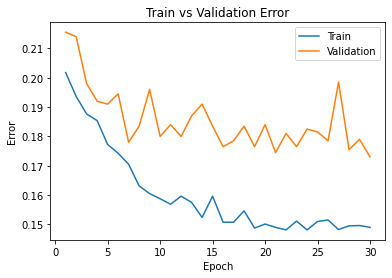

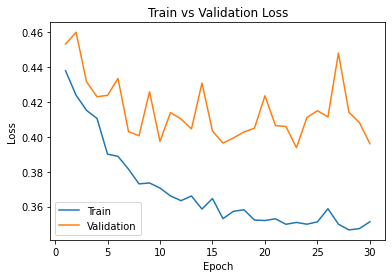

In [28]:
small_path = get_model_name("small", 64, 0.01, 29)
plot_training_curve(small_path)

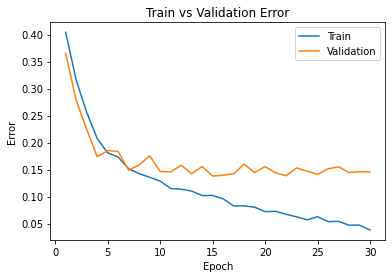

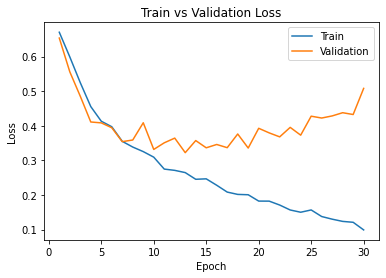

In [29]:
large_path = get_model_name("large", 64, 0.01, 29)
plot_training_curve(large_path)

### Part (f) - 3pt

Describe what you notice about the training curve.
How do the curves differ for `small_net` and `large_net`?
Identify any occurences of underfitting and overfitting.

The small_net has a lot of noise compared to the large_net. Furthermore, the small_net is very slightly overfitting in all the epochs, while the large_net only begins to overfit at an epoch of around 7. 

## Part 3. Optimization Parameters [4 pt]

For this section, we will work with `large_net` only.

### Part (a) - 1pt

Train `large_net` with all default parameters, except set `learning_rate=0.001`.
Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *lowering* the learning rate.

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.4585, Train loss: 0.6922090911865234 |Validation err: 0.4145, Validation loss: 0.6918484680354595
Epoch 2: Train err: 0.404, Train loss: 0.6912762837409974 |Validation err: 0.401, Validation loss: 0.6909310147166252
Epoch 3: Train err: 0.39125, Train loss: 0.6897973504066467 |Validation err: 0.3825, Validation loss: 0.6891596242785454
Epoch 4: Train err: 0.391, Train loss: 0.6871493883132934 |Validation err: 0.379, Validation loss: 0.6860428061336279
Epoch 5: Train err: 0.37275, Train loss: 0.6819084930419922 |Validation err: 0.3725, Validation loss: 0.6794121749699116
Epoch 6: Train err: 0.367, Train loss: 0.6722611665725708 |Validation err: 0.3745, Validation loss: 0.6701584309339523
Epoch 7: Train err: 0.367375, Train loss: 0.6595345559120178 |Validation err: 0.3785, Validation loss: 0.6627401951700449
Epoch 8: Train err: 0.36425, Train loss: 0.6492524642944336 |Validation err: 0.3765, 

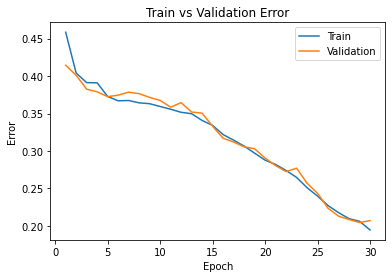

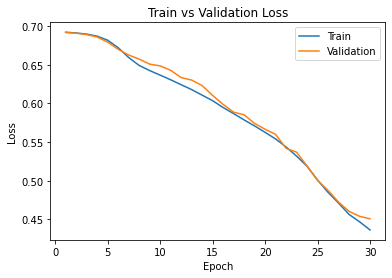

In [30]:
# Note: When we re-construct the model, we start the training
# with *random weights*. If we omit this code, the values of
# the weights will still be the previously trained values.
large_net = LargeNet()
train_net(large_net, batch_size=64, learning_rate=0.001, num_epochs=30)
large_path = get_model_name("large", 64, 0.001, 29)
plot_training_curve(large_path)

As we can see, this model takes **slightly longer** to train. Furthermore, we can see from the error and loss curves that the model performs **worse** than the one with the larger learning rate at the same epoch. We can also see that there is a **less noise** in both the error and loss.

### Part (b) - 1pt

Train `large_net` with all default parameters, except set `learning_rate=0.1`. 
Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *increasing* the learning rate.

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.3435, Train loss: 0.6152465670108795 |Validation err: 0.2655, Validation loss: 0.5401884317398071
Epoch 2: Train err: 0.26275, Train loss: 0.5457514839172364 |Validation err: 0.2255, Validation loss: 0.47185863088816404
Epoch 3: Train err: 0.205125, Train loss: 0.4577759726047516 |Validation err: 0.196, Validation loss: 0.42472241446375847
Epoch 4: Train err: 0.18375, Train loss: 0.42987853920459745 |Validation err: 0.193, Validation loss: 0.4498207103461027
Epoch 5: Train err: 0.182875, Train loss: 0.4176621789932251 |Validation err: 0.1765, Validation loss: 0.3949774377979338
Epoch 6: Train err: 0.1775, Train loss: 0.407295166015625 |Validation err: 0.218, Validation loss: 0.47349493484944105
Epoch 7: Train err: 0.15425, Train loss: 0.36420914459228515 |Validation err: 0.1665, Validation loss: 0.3992267334833741
Epoch 8: Train err: 0.143125, Train loss: 0.34258134818077085 |Validation er

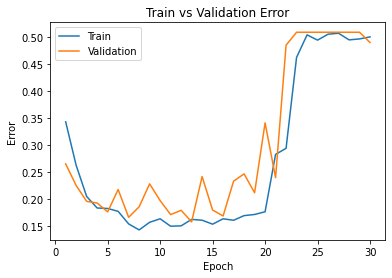

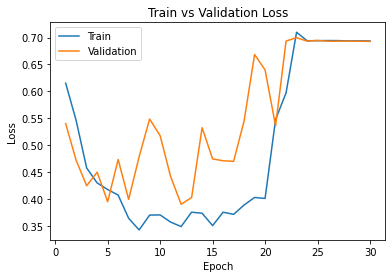

In [31]:
large_net = LargeNet()
train_net(large_net, batch_size=64, learning_rate=0.1, num_epochs=30)
large_path = get_model_name("large", 64, 0.1, 29)
plot_training_curve(large_path)

As we can see, this model takes **slightly shorter time** to train. Furthermore, we can see from the error and loss curves that the model performs **worse** than the one with the larger learning rate at the same epoch. We can also see that there is a lot **more noise** in both the error and loss.

### Part (c) - 1pt

Train `large_net` with all default parameters, including with `learning_rate=0.01`.
Now, set `batch_size=512`. Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *increasing* the batch size.

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.466, Train loss: 0.6923338621854782 |Validation err: 0.44, Validation loss: 0.6918952614068985
Epoch 2: Train err: 0.413, Train loss: 0.6914851702749729 |Validation err: 0.403, Validation loss: 0.6910877674818039
Epoch 3: Train err: 0.4035, Train loss: 0.6901152096688747 |Validation err: 0.3925, Validation loss: 0.6894860416650772
Epoch 4: Train err: 0.4, Train loss: 0.6876360848546028 |Validation err: 0.393, Validation loss: 0.686403214931488
Epoch 5: Train err: 0.373625, Train loss: 0.6824756488204002 |Validation err: 0.374, Validation loss: 0.6796957552433014
Epoch 6: Train err: 0.364375, Train loss: 0.6726636365056038 |Validation err: 0.3685, Validation loss: 0.6694183051586151
Epoch 7: Train err: 0.36475, Train loss: 0.6583152934908867 |Validation err: 0.3765, Validation loss: 0.659694567322731
Epoch 8: Train err: 0.365, Train loss: 0.6487302668392658 |Validation err: 0.38, Validation

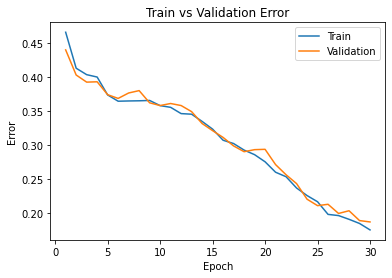

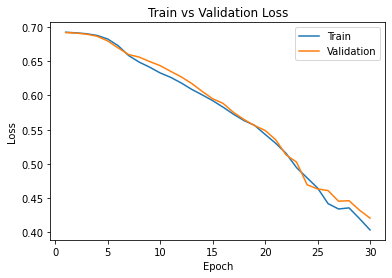

In [32]:
large_net = LargeNet()
train_net(large_net, batch_size=512, learning_rate=0.01, num_epochs=30)
large_path = get_model_name("large", 512, 0.01, 29)
plot_training_curve(large_path)

As we can see, this model takes **shorter time** to train. Furthermore, we can see from the error and loss curves that the model performs **worse** than the one with the larger learning rate at the same epoch. We can also see that there is a lot **less noise** in both the error and loss.

### Part (d) - 1pt

Train `large_net` with all default parameters, including with `learning_rate=0.01`.
Now, set `batch_size=16`. Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *decreasing* the batch size.

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.34375, Train loss: 0.6175165125727653 |Validation err: 0.2625, Validation loss: 0.540454069852829
Epoch 2: Train err: 0.22325, Train loss: 0.4730004854500294 |Validation err: 0.2035, Validation loss: 0.43918069565296175
Epoch 3: Train err: 0.25525, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 4: Train err: 0.502375, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 5: Train err: 0.502375, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 6: Train err: 0.502375, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 7: Train err: 0.502375, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 8: Train err: 0.502375, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 9: Train err: 0.502375, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 10: Train err: 0.502375, Train lo

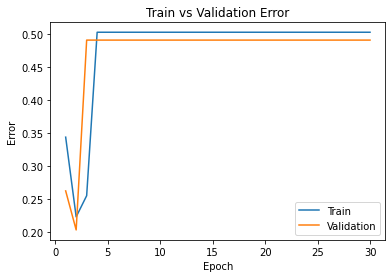

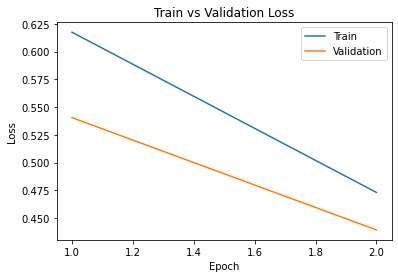

In [33]:
large_net = LargeNet()
train_net(large_net, batch_size=16, learning_rate=0.01, num_epochs=30)
large_path = get_model_name("large", 16, 0.01, 29)
plot_training_curve(large_path)

As we can see, this model takes **longer time** to train. Furthermore, we can see from the error and loss curves that the model performs **significantly worse** than the one with the larger learning rate at the same epoch. There is also an issue with training and validation loss as they come out as nan following epoch 2. 




## Part 4. Hyperparameter Search [4 pt]

### Part (a) - 1pt

Based on the plots from above, choose another set of values for the hyperparameters (network, batch_size, learning_rate)
that you think would help you improve the validation accuracy. Justify your choice.


Choosing a larger batch size and larger number of epochs to allow for better performance while still maintaining a relatively low run time
1.   Batch size = 512
2.   Learning rate = 0.01 
3.   Epochs = 50 



### Part (b) - 1pt

Train the model with the hyperparameters you chose in part(a), and include the training curve.

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.466, Train loss: 0.6923338621854782 |Validation err: 0.44, Validation loss: 0.6918952614068985
Epoch 2: Train err: 0.413, Train loss: 0.6914851702749729 |Validation err: 0.403, Validation loss: 0.6910877674818039
Epoch 3: Train err: 0.4035, Train loss: 0.6901152096688747 |Validation err: 0.3925, Validation loss: 0.6894860416650772
Epoch 4: Train err: 0.4, Train loss: 0.6876360848546028 |Validation err: 0.393, Validation loss: 0.686403214931488
Epoch 5: Train err: 0.373625, Train loss: 0.6824756488204002 |Validation err: 0.374, Validation loss: 0.6796957552433014
Epoch 6: Train err: 0.364375, Train loss: 0.6726636365056038 |Validation err: 0.3685, Validation loss: 0.6694183051586151
Epoch 7: Train err: 0.36475, Train loss: 0.6583152934908867 |Validation err: 0.3765, Validation loss: 0.659694567322731
Epoch 8: Train err: 0.365, Train loss: 0.6487302668392658 |Validation err: 0.38, Validation

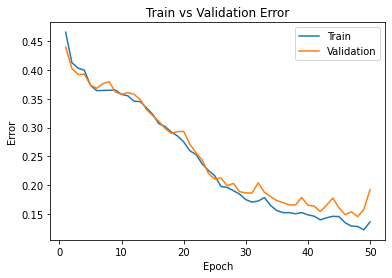

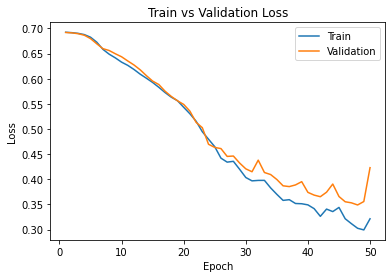

In [34]:
large_net = LargeNet()
train_net(large_net, batch_size=512, learning_rate=0.01, num_epochs=50)
large_path = get_model_name("large", 512, 0.01, 49)
plot_training_curve(large_path)

### Part (c) - 1pt

Based on your result from Part(a), suggest another set of hyperparameter values to try. 
Justify your choice.

Choosing a the default settings and a smaller number of epochs to allow for similar performance without overfitting.
1.   Batch size = 64
2.   Learning rate = 0.01 
3.   Epochs = 15

### Part (d) - 1pt

Train the model with the hyperparameters you chose in part(c), and include the training curve.

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.418375, Train loss: 0.6771526303291321 |Validation err: 0.3735, Validation loss: 0.6568413395434618
Epoch 2: Train err: 0.32925, Train loss: 0.6106989068984985 |Validation err: 0.2855, Validation loss: 0.5646512666717172
Epoch 3: Train err: 0.2525, Train loss: 0.5227655339241027 |Validation err: 0.222, Validation loss: 0.4760589888319373
Epoch 4: Train err: 0.2065, Train loss: 0.45365891790390017 |Validation err: 0.2015, Validation loss: 0.4502973286435008
Epoch 5: Train err: 0.182375, Train loss: 0.4158656573295593 |Validation err: 0.2245, Validation loss: 0.47046390920877457
Epoch 6: Train err: 0.182, Train loss: 0.4090804386138916 |Validation err: 0.193, Validation loss: 0.403349319472909
Epoch 7: Train err: 0.150875, Train loss: 0.3569050822257996 |Validation err: 0.1595, Validation loss: 0.37054385943338275
Epoch 8: Train err: 0.146875, Train loss: 0.34201070928573607 |Validation err:

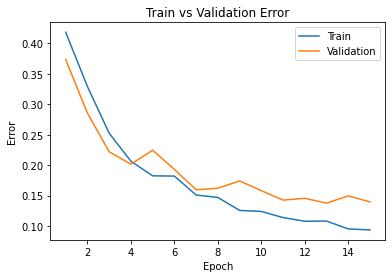

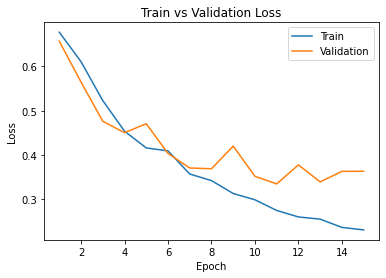

In [35]:
large_net = LargeNet()
train_net(large_net, batch_size=64, learning_rate=0.01, num_epochs=15)
large_path = get_model_name("large", 64, 0.01, 14)
plot_training_curve(large_path)

## Part 4. Evaluating the Best Model [9 pt]


### Part (a) - 1pt

Choose the **best** model that you have so far. This means choosing the best model checkpoint,
including the choice of `small_net` vs `large_net`, the `batch_size`, `learning_rate`, 
**and the epoch number**.

Modify the code below to load your chosen set of weights to the model object `net`.

In [36]:
net = LargeNet()
model_path = get_model_name(net.name, batch_size=64, learning_rate=0.01, epoch=15)
state = torch.load(model_path)
net.load_state_dict(state)

<All keys matched successfully>

### Part (b) - 2pt

Justify your choice of model from part (a).

This model had the best performance in terms of error (without overfitting), as well as a very short running time (only 64 seconds)

### Part (c) - 2pt

Using the code in Part 0, any code from lecture notes, or any code that you write,
compute and report the **test classification error** for your chosen model.

In [37]:
def test_net(net, batch_size=64, learning_rate=0.01, num_epochs=30):
    ########################################################################
    # Test a classifier on cars vs trucks
    target_classes = ["car", "truck"]
    ########################################################################
    # Fixed PyTorch random seed for reproducible result
    torch.manual_seed(1000)
    ########################################################################
    # Obtain the PyTorch data loader objects to load batches of the datasets
    train_loader, val_loader, test_loader, classes = get_data_loader(
            target_classes, batch_size)
    ########################################################################
    # Define the Loss function and optimizer
    # The loss function will be Binary Cross Entropy (BCE). In this case we
    # will use the BCEWithLogitsLoss which takes unnormalized output from
    # the neural network and scalar label.
    # Optimizer will be SGD with Momentum.
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
    ########################################################################
    # Set up some numpy arrays to store the test loss/accuracy
    test_err = np.zeros(num_epochs)
    test_loss = np.zeros(num_epochs)
    # val_err = np.zeros(num_epochs)
    # val_loss = np.zeros(num_epochs)
    ########################################################################
    # Test the network
    # Loop over the data iterator and sample a new batch of testing data
    # Get the output from the network
    start_time = time.time()
    for epoch in range(num_epochs):  # loop over the dataset multiple times
        total_test_loss = 0.0
        total_test_err = 0.0
        total_epoch = 0
        for i, data in enumerate(test_loader, 0):
            # Get the inputs
            inputs, labels = data
            labels = normalize_label(labels) # Convert labels to 0/1
            # # Zero the parameter gradients
            # optimizer.zero_grad()
            # Forward pass, backward pass, and optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels.float())
            # loss.backward()
            # optimizer.step()
            # Calculate the statistics
            corr = (outputs > 0.0).squeeze().long() != labels
            total_test_err += int(corr.sum())
            total_test_loss += loss.item()
            total_epoch += len(labels)
        test_err[epoch] = float(total_test_err) / total_epoch
        test_loss[epoch] = float(total_test_loss) / (i+1)
        # val_err[epoch], val_loss[epoch] = evaluate(net, val_loader, criterion)
        print(("Epoch {}: Test err: {}, Test loss: {} |").format(
                   epoch + 1,
                   test_err[epoch],
                   test_loss[epoch]))
        # Save the current model (checkpoint) to a file
        # model_path = get_model_name(net.name, batch_size, learning_rate, epoch)
        # torch.save(net.state_dict(), model_path)
    print('Finished Testing')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))
    # Write the train/test loss/err into CSV file for plotting later
    epochs = np.arange(1, num_epochs + 1)
    # np.savetxt("{}_train_err.csv".format(model_path), train_err)
    # np.savetxt("{}_train_loss.csv".format(model_path), train_loss)
    # np.savetxt("{}_val_err.csv".format(model_path), val_err)
    # np.savetxt("{}_val_loss.csv".format(model_path), val_loss)

In [41]:
# If you use the `evaluate` function provided in part 0, you will need to 
# set batch_size > 1
test_net(large_net, batch_size=64, learning_rate=0.01, num_epochs=15)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Test err: 0.136, Test loss: 0.34577916702255607 |
Epoch 2: Test err: 0.136, Test loss: 0.3557350058108568 |
Epoch 3: Test err: 0.136, Test loss: 0.34502130444161594 |
Epoch 4: Test err: 0.136, Test loss: 0.34932939521968365 |
Epoch 5: Test err: 0.136, Test loss: 0.3507343642413616 |
Epoch 6: Test err: 0.136, Test loss: 0.3490048027597368 |
Epoch 7: Test err: 0.136, Test loss: 0.349205378908664 |
Epoch 8: Test err: 0.136, Test loss: 0.3474231297150254 |
Epoch 9: Test err: 0.136, Test loss: 0.3500805259682238 |
Epoch 10: Test err: 0.136, Test loss: 0.345177142880857 |
Epoch 11: Test err: 0.136, Test loss: 0.3498097602277994 |
Epoch 12: Test err: 0.136, Test loss: 0.346268996829167 |
Epoch 13: Test err: 0.136, Test loss: 0.3527373601682484 |
Epoch 14: Test err: 0.136, Test loss: 0.36465303553268313 |
Epoch 15: Test err: 0.136, Test loss: 0.3517066182103008 |
Finished Testing
Total time elapsed: 11.29 seco

### Part (d) - 2pt

How does the test classification error compare with the **validation error**?
Explain why you would expect the test error to be *higher* than the validation error.

The validation error was 0.1395 which is almost exactly the same as the testing error of 0.136. But the test stayed consistent in the model throughout the epochs.

### Part (e) - 2pt

Why did we only use the test data set at the very end?
Why is it important that we use the test data as little as possible?

The testing dataset is meant to give an **unbiased** quantification of the model's TUNED performance, while the validation is used to tune the model. Therefore, to fully allow for an unbiased evaluation, the testing dataset should be used at the very end of the model once its no long being altered with. 

## Part 5. Fully-Connected Linear ANN vs CNN [3 pt]

Test out a 3-layer linear fully-connected ANN architecture (see simpleANN below). You should explore different hyperparameter settings to determine how well you can do on the validation dataset. Once satisified with the performance, you may test it out on the test data.

How does the your best CNN model compare with an 2-layer linear ANN model (no convolutional layers) on classifying car and truck images?

In [42]:
class simpleANN(nn.Module):
    def __init__(self):
        super(simpleANN, self).__init__()
        self.name = "simple"
        self.fc1 = nn.Linear(32*32*3, 100)
        self.fc2 = nn.Linear(100, 20)
        self.fc3 = nn.Linear(20, 1)

    def forward(self, x):
        x = x.view(-1, 32*32*3)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.463875, Train loss: 0.690206341445446 |Validation err: 0.423, Validation loss: 0.6866980344057083
Epoch 2: Train err: 0.398, Train loss: 0.6826386153697968 |Validation err: 0.388, Validation loss: 0.6793198883533478
Epoch 3: Train err: 0.3725, Train loss: 0.6747893653810024 |Validation err: 0.379, Validation loss: 0.6729468405246735
Epoch 4: Train err: 0.36675, Train loss: 0.6682504713535309 |Validation err: 0.3695, Validation loss: 0.6679843068122864
Epoch 5: Train err: 0.36325, Train loss: 0.6630440056324005 |Validation err: 0.373, Validation loss: 0.6638389080762863
Epoch 6: Train err: 0.36125, Train loss: 0.6586457267403603 |Validation err: 0.3735, Validation loss: 0.6607986241579056
Epoch 7: Train err: 0.359, Train loss: 0.6548961102962494 |Validation err: 0.3695, Validation loss: 0.6577963382005692
Epoch 8: Train err: 0.3565, Train loss: 0.6514068841934204 |Validation err: 0.366, Val

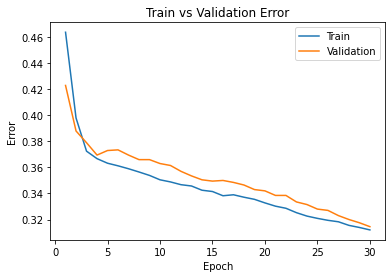

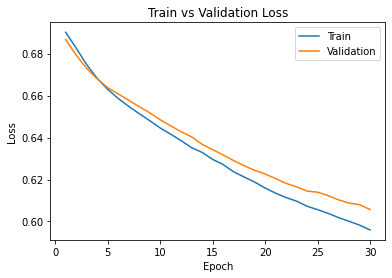

In [52]:
simple_net = simpleANN()
train_net(simple_net, batch_size=512, learning_rate=0.001, num_epochs=30)
simple_path = get_model_name("simple", 512, 0.001, 29)
plot_training_curve(simple_path)

In [53]:
test_net(simple_net, batch_size=512, learning_rate=0.001, num_epochs=30)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Test err: 0.3095, Test loss: 0.6000373214483261 |
Epoch 2: Test err: 0.3095, Test loss: 0.5993811339139938 |
Epoch 3: Test err: 0.3095, Test loss: 0.5998425036668777 |
Epoch 4: Test err: 0.3095, Test loss: 0.5995392948389053 |
Epoch 5: Test err: 0.3095, Test loss: 0.5990542322397232 |
Epoch 6: Test err: 0.3095, Test loss: 0.5999980270862579 |
Epoch 7: Test err: 0.3095, Test loss: 0.5998820513486862 |
Epoch 8: Test err: 0.3095, Test loss: 0.5994766801595688 |
Epoch 9: Test err: 0.3095, Test loss: 0.5996707677841187 |
Epoch 10: Test err: 0.3095, Test loss: 0.5999104231595993 |
Epoch 11: Test err: 0.3095, Test loss: 0.5999518781900406 |
Epoch 12: Test err: 0.3095, Test loss: 0.5990020781755447 |
Epoch 13: Test err: 0.3095, Test loss: 0.599196270108223 |
Epoch 14: Test err: 0.3095, Test loss: 0.5996048897504807 |
Epoch 15: Test err: 0.3095, Test loss: 0.5990628302097321 |
Epoch 16: Test err: 0.3095, Test l

The performance of this simple ANN is **worse than the three layer CNN** according to the test error (more than double the error).

### Saving to HTML
Detailed instructions for saving to HTML can be found <a href="https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab/64487858#64487858">here</a>. Provided below are a summary of the instructions:

(1) download your ipynb file by clicking on File->Download.ipynb

(2) reupload your file to the temporary Google Colab storage (you can access the temporary storage from the tab to the left)

(3) run the following:

In [40]:
%%shell
jupyter nbconvert --to html LAB_1_ANN_and_PyTorch.ipynb

[NbConvertApp] WARNING | pattern u'LAB_1_ANN_and_PyTorch.ipynb' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--no-input
    Exclude input cells and output prompts from converted document. 
    This mode is ideal for generating code-free reports.
--stdout
    Write notebook output to stdout instead of files.
--stdin
    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'
--inplace

CalledProcessError: ignored

(4) the html file will be available for download in the temporary Google Colab storage

(5) review the html file and make sure all the results are visible before submitting your assignment to Quercus